In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#creating dataframe from dataset (.csv) file and displaying the first 5 rows
path = 'PHQ9 data.csv'
original_df = pd.read_csv(path)
#displaying head of df
original_df.head()

,Unnamed: 0,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,...,q14,q16,q46,q47,happiness.score,time,period.name,start.time,phq.day,id
0,1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,0.0,NaN,NaN,NaN,2,2017-01-22 20:11:59,evening,2017-01-09 07:22:37,-0.951921,1
1,2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,NaN,1.0,NaN,3,2017-02-08 22:53:06,evening,2017-01-09 07:22:37,16.159965,1
2,3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,3,2017-02-08 08:00:46,morning,2017-01-09 07:22:37,15.540289,1
3,4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,1.0,NaN,NaN,2,2017-01-22 14:01:25,midday,2017-01-09 07:22:37,-1.209259,1
4,5,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,1.0,NaN,1.0,NaN,2,2017-01-21 15:37:24,midday,2017-01-09 07:22:37,-2.142604,1


In [3]:
#dropping repeated columns and columns not related to our analysis
dropped_df = original_df.drop(columns=['Unnamed: 0', 'id', 'phq.day', 'start.time', 
                                       'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 
                                       'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q16', 'q46', 'q47'])
#displaying head of df
dropped_df.head()

,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,phq9,age,sex,happiness.score,time,period.name
0,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2,2017-01-22 20:11:59,evening
1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,3,2017-02-08 22:53:06,evening
2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,3,2017-02-08 08:00:46,morning
3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2,2017-01-22 14:01:25,midday
4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2,2017-01-21 15:37:24,midday


In [23]:
#creating empty lists to append information to then add as columns to new df
total_scores = []
depression_severity = []
season = []
#looping through dropped_df
for index, row in dropped_df.iterrows():
    #calculating total score for each row and appending to the total_scores list
    total_score = row['phq1'] + row['phq2'] + row['phq3'] + row['phq4'] + row['phq5'] + row['phq6'] + row['phq7'] + row['phq8'] + row['phq9']
    total_scores.append(total_score)
    
    #determining depression severity based on the total score and appending to the depression_severity list
    if pd.isna(total_score):
        depression_severity.append(np.nan)
    elif total_score <= 4:
        depression_severity.append('minimal')
    elif total_score <= 9:
        depression_severity.append('mild')
    elif total_score <= 14:
        depression_severity.append('moderate')
    elif total_score <= 19:
        depression_severity.append('moderately severe')
    else:
        depression_severity.append('severe')
    
    #finding the season based on the time column in dropped_df and appending the season to the season list
    date = row['time'].split()
    year_month_day = date[0].split('-')
    if year_month_day[1] == '12' or  year_month_day[1] == '01' or year_month_day[1] == '02':
        season.append('winter')
    elif year_month_day[1] == '03' or  year_month_day[1] == '04' or year_month_day[1] == '05':
        season.append('spring')
    elif year_month_day[1] == '06' or  year_month_day[1] == '07' or year_month_day[1] == '08':
        season.append('summer')
    else: 
        season.append('fall')
#creating a new df for the column additions
total_scores_df = dropped_df
#adding a total.score, depression.severity, and season column to total_scores_df
total_scores_df['total.score'] = total_scores
total_scores_df['depression.severity'] = depression_severity
total_scores_df['season'] = season
#reordering columns for readability
total_scores_df = total_scores_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,15,16,10,11,12,13,17,14]]
#displaying head of new df
total_scores_df.head()

,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,phq9,total.score,depression.severity,age,sex,happiness.score,time,season,period.name
0,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2,2017-01-22 20:11:59,winter,evening
1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,3,2017-02-08 22:53:06,winter,evening
2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,3,2017-02-08 08:00:46,winter,morning
3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2,2017-01-22 14:01:25,winter,midday
4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2,2017-01-21 15:37:24,winter,midday


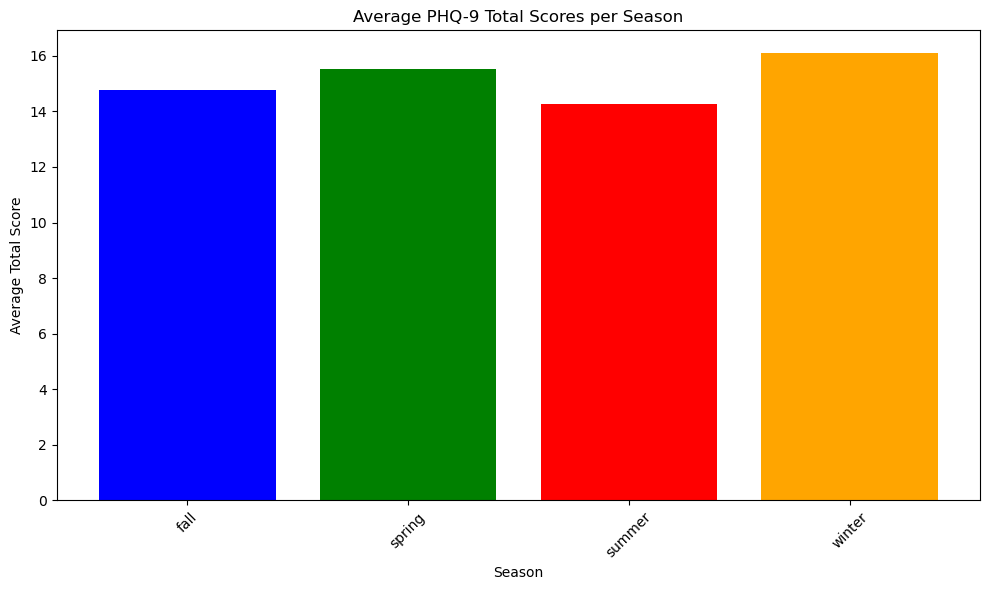

In [5]:
# Group the data by season and calculate the mean of total scores for each season
season_scores = total_scores_df.groupby('season')['total.score'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(10,6))
plt.bar(season_scores['season'], season_scores['total.score'], color=['blue', 'green', 'red', 'orange'])
plt.title('Average PHQ-9 Total Scores per Season')
plt.xlabel('Season')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

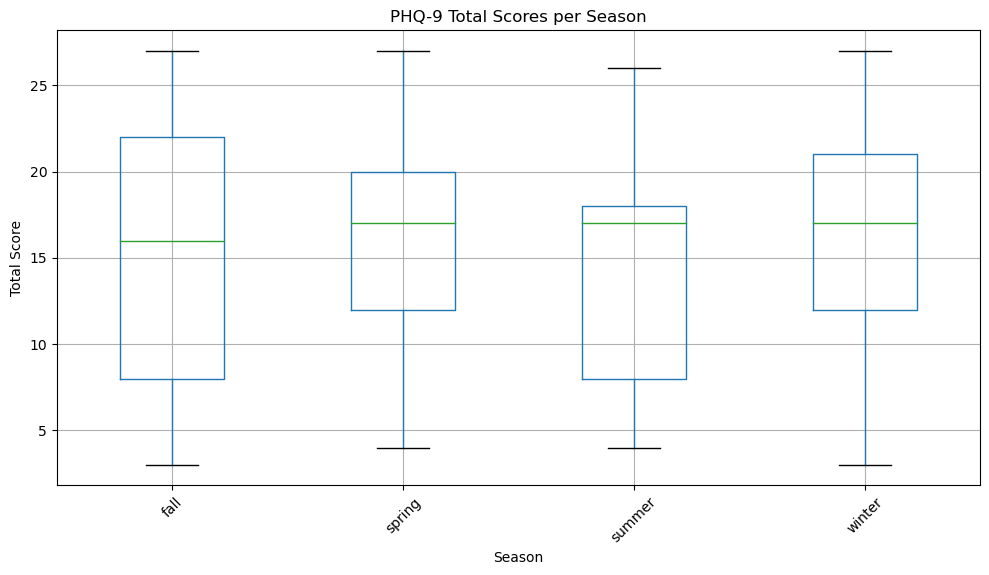

In [6]:
# Plotting the box plot for total scores per season
plt.figure(figsize=(10,6))
total_scores_df.boxplot(column='total.score', by='season', figsize=(10,6))

plt.title('PHQ-9 Total Scores per Season')
plt.suptitle('')  # Suppress the automatic "Boxplot grouped by season" title
plt.xlabel('Season')
plt.ylabel('Total Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

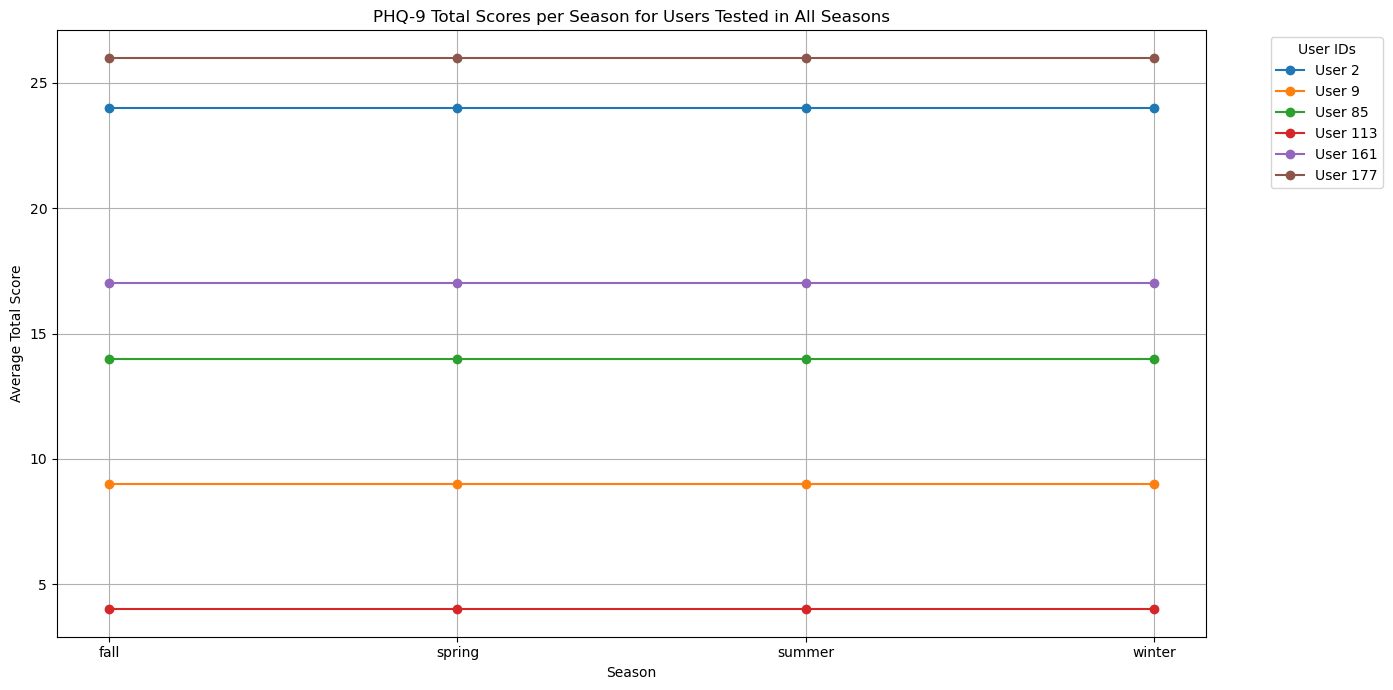

In [7]:
# Filter the DataFrame to include only users who have taken the test in all four seasons
users_all_seasons = total_scores_df.groupby('user_id').filter(lambda x: x['season'].nunique() == 4)

# Group the data by user_id and season and calculate the mean total score for each group
user_season_scores = users_all_seasons.groupby(['user_id', 'season'])['total.score'].mean().unstack()

# Plotting the line graph
plt.figure(figsize=(14, 7))

# Plotting a line for each user
for user_id in user_season_scores.index:
    plt.plot(user_season_scores.columns, user_season_scores.loc[user_id], marker='o', label=f'User {user_id}')

plt.title('PHQ-9 Total Scores per Season for Users Tested in All Seasons')
plt.xlabel('Season')
plt.ylabel('Average Total Score')
plt.legend(title='User IDs', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside of the plot
plt.grid(True)
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

In [5]:
#statistics grouped by season then user
agg_df = total_scores_df.groupby(['season', 'user_id'])[['total.score']].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index().rename(columns={0:'n'})
agg_df.head()

season user_id total.score                      
                        mean median  var  std  sem
0   fall       2        24.0   24.0  0.0  0.0  0.0
1   fall       4        17.0   17.0  0.0  0.0  0.0
2   fall       6        18.0   18.0  0.0  0.0  0.0
3   fall       7        23.0   23.0  0.0  0.0  0.0
4   fall       9         9.0    9.0  0.0  0.0  0.0

In [13]:
# Calculating the number of unique user IDs in the dataset
unique_user_ids = total_scores_df['user_id'].nunique()
unique_user_ids

185

In [11]:
# Counting how many unique people took the test in each season
people_per_season = total_scores_df.groupby('season')['user_id'].nunique()
people_per_season


season
fall       26
spring     47
summer     18
winter    185
Name: user_id, dtype: int64

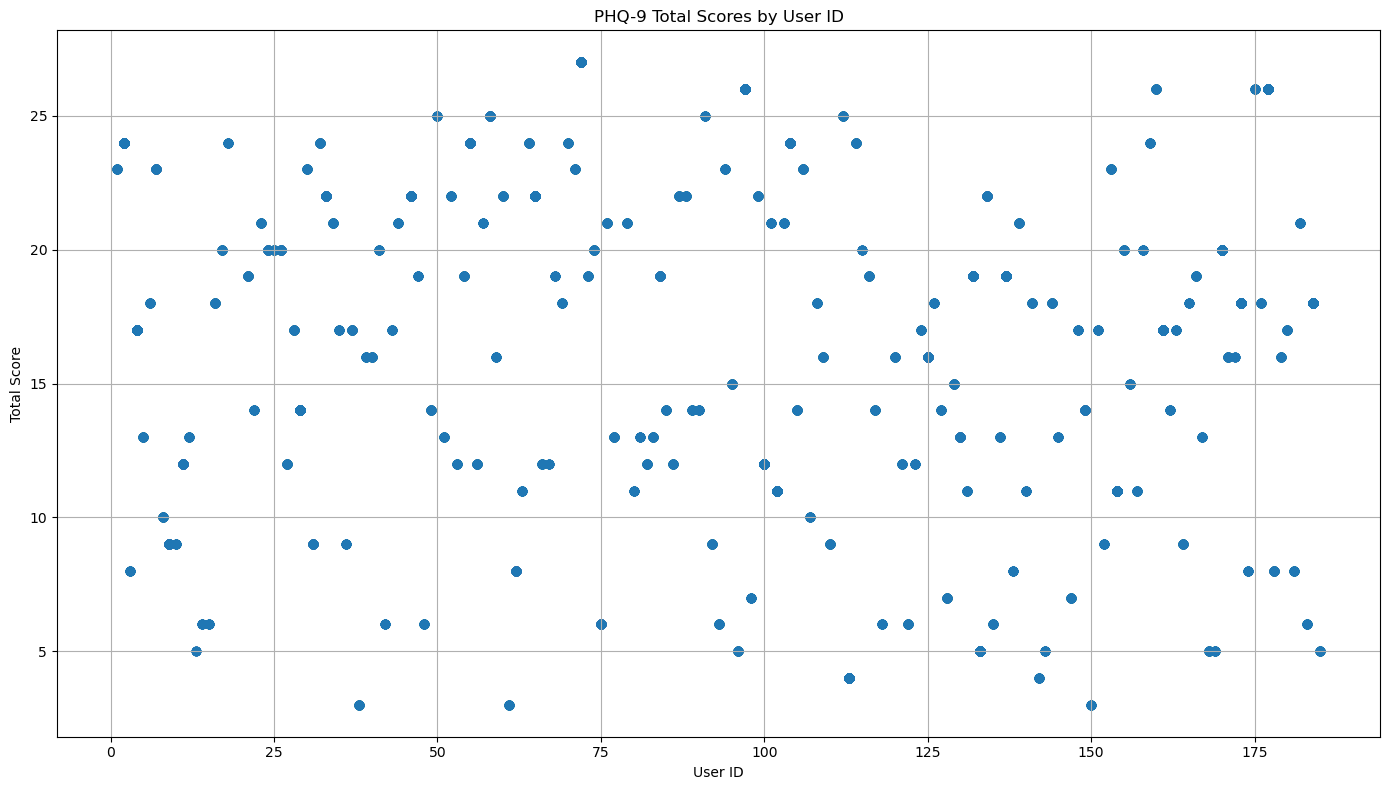

In [9]:
# Plotting a scatter plot for each user's total score
plt.figure(figsize=(14, 8))

# Create a scatter plot where each point represents a user's total score
plt.scatter(total_scores_df['user_id'], total_scores_df['total.score'], alpha=0.6)

plt.title('PHQ-9 Total Scores by User ID')
plt.xlabel('User ID')
plt.ylabel('Total Score')
plt.grid(True)
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

In [14]:
# Plotting a scatter plot for each user's total score with different colors for each season
plt.figure(figsize=(14, 8))

# Loop through each season and plot with a different color
for season in seasons:
    season_data = total_scores_df[total_scores_df['season'] == season]
    plt.scatter(season_data['user_id'], season_data['total.score'], alpha=0.6, label=season.capitalize(), color=colors[season])

plt.title('PHQ-9 Total Scores by User ID Across Seasons')
plt.xlabel('User ID')
plt.ylabel('Total Score')
plt.legend(title='Season')
plt.grid(True)
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

NameError: name 'seasons' is not defined

<Figure size 1400x800 with 0 Axes>

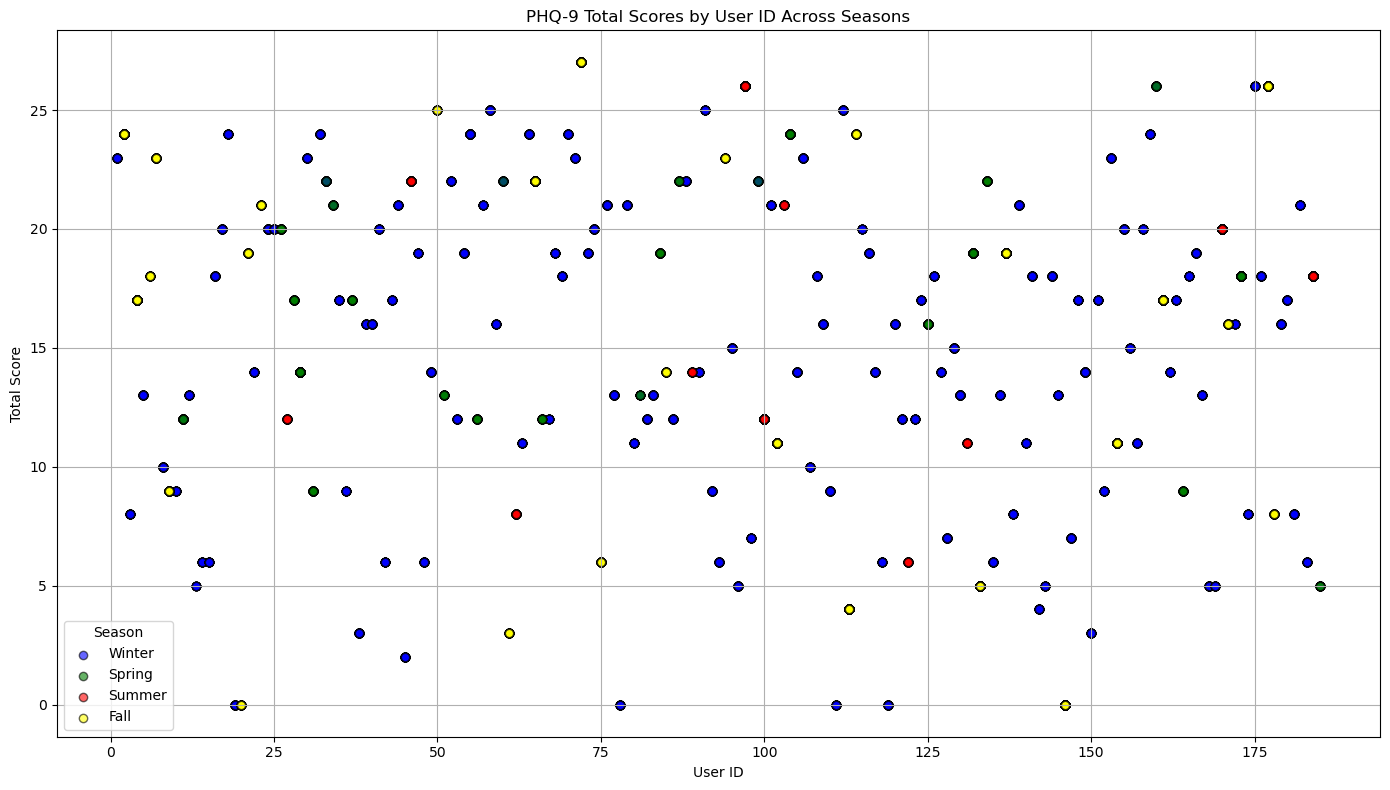

In [15]:


# Define a function to determine the season based on the 'time' column
def determine_season(date_str):
    month = pd.to_datetime(date_str).month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

# Apply the function to create a new 'season' column
total_scores_df['season'] = total_scores_df['time'].apply(determine_season)

# Assuming the total score is the sum of columns from 'phq1' to 'phq9'
score_columns = ['phq1', 'phq2', 'phq3', 'phq4', 'phq5', 'phq6', 'phq7', 'phq8', 'phq9']
total_scores_df['total.score'] = total_scores_df[score_columns].sum(axis=1)

# Now let's create the scatter plot with the defined colors and styles
colors = {
    'winter': 'blue',
    'spring': 'green',
    'summer': 'red',
    'fall': 'yellow'
}

plt.figure(figsize=(14, 8))

# Loop through each season and plot with updated colors and styles
for season in ['winter', 'spring', 'summer', 'fall']:
    season_data = total_scores_df[total_scores_df['season'] == season]
    plt.scatter(season_data['user_id'], season_data['total.score'], alpha=0.6, label=season.capitalize(), 
                color=colors[season], edgecolor='black', marker='o')

plt.title('PHQ-9 Total Scores by User ID Across Seasons')
plt.xlabel('User ID')
plt.ylabel('Total Score')
plt.legend(title='Season')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


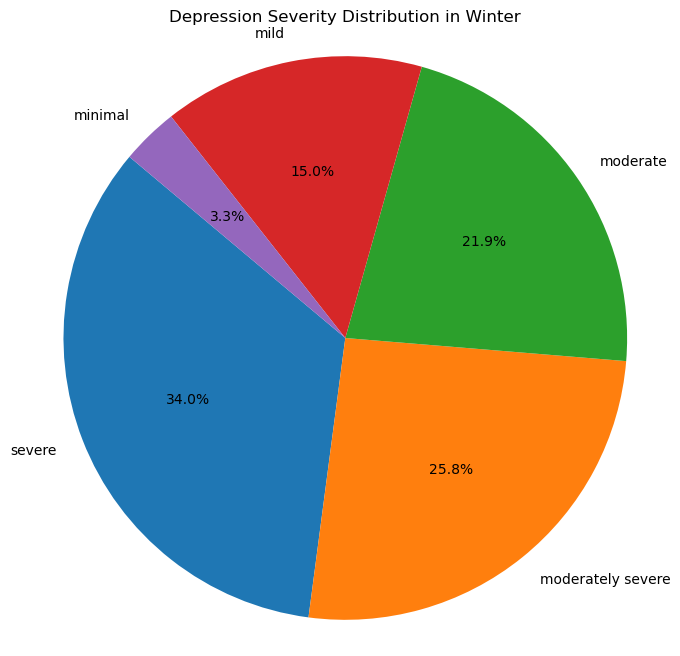

In [16]:
# Filter the data for the winter season
winter_data = total_scores_df[total_scores_df['season'] == 'winter']

# Count the number of tests taken in winter divided by depression severity
winter_severity_counts = winter_data['depression.severity'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(winter_severity_counts, labels=winter_severity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Depression Severity Distribution in Winter')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


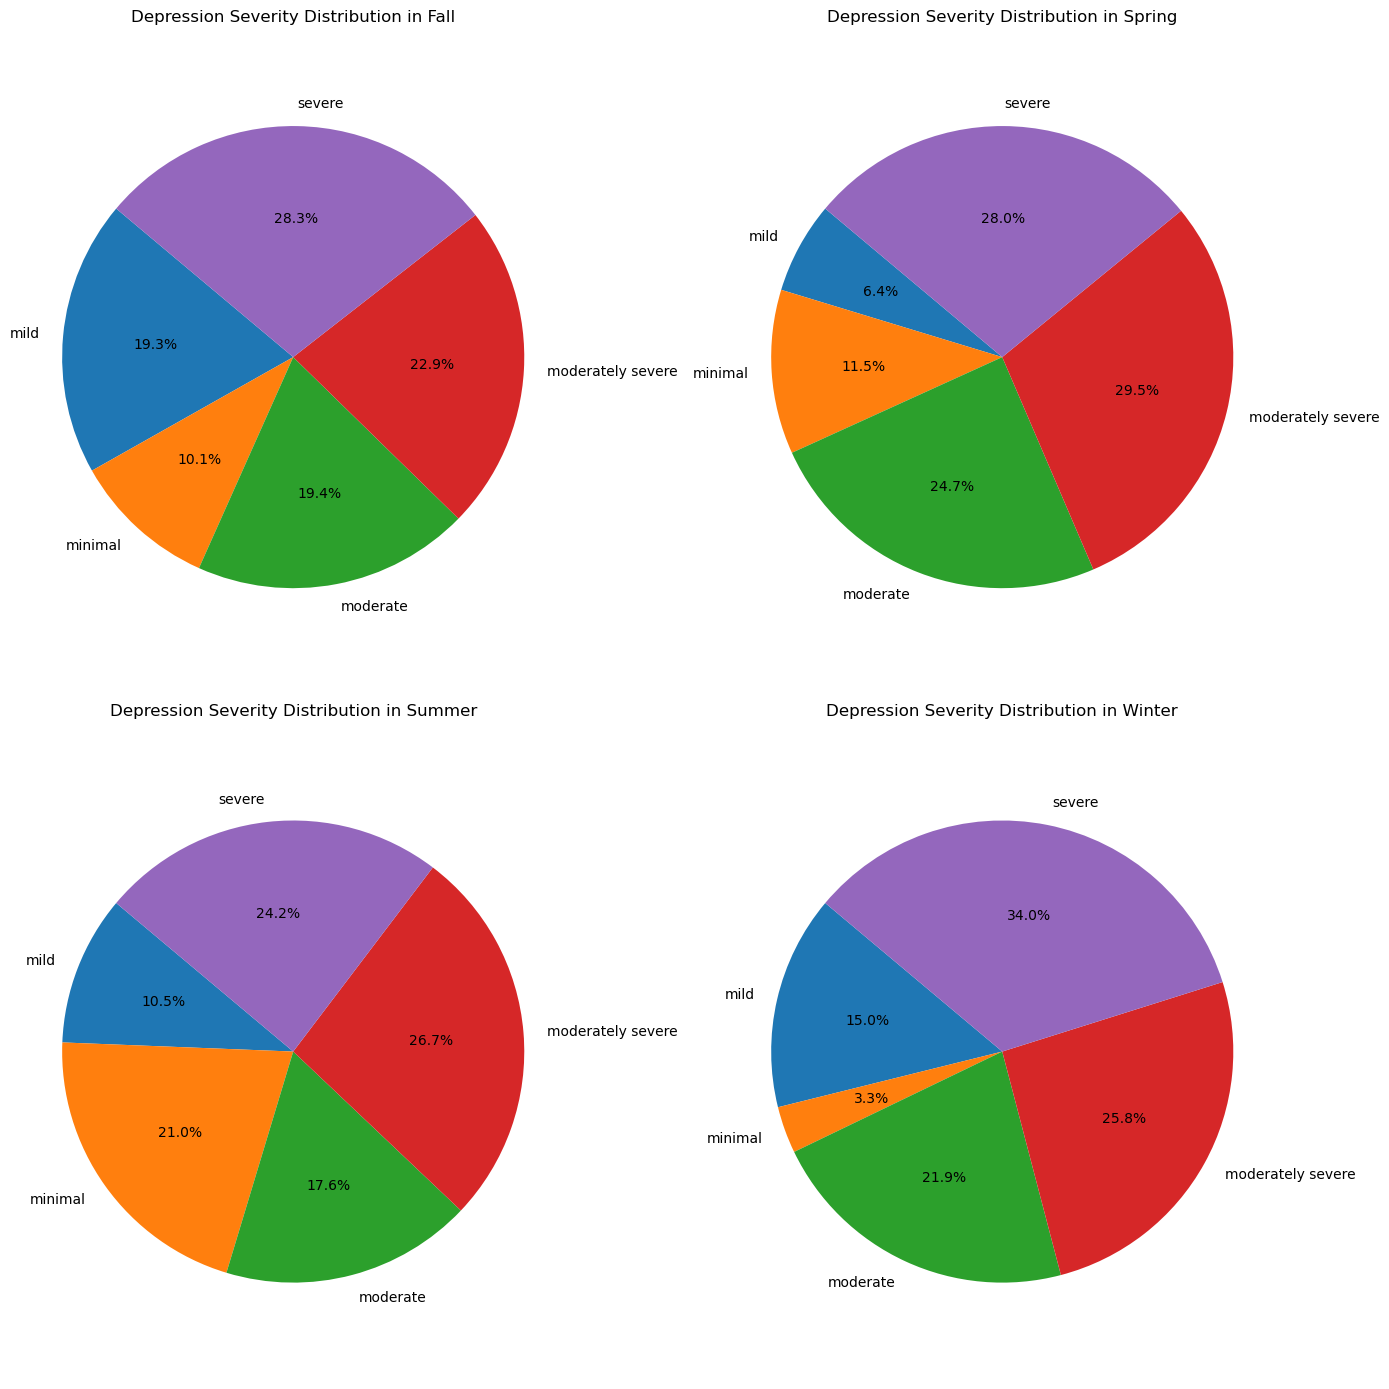

In [17]:
# Create a pie chart for the distribution of depression severity for each season

# First, we will count the number of tests taken in each season divided by depression severity
severity_counts_per_season = total_scores_df.groupby('season')['depression.severity'].value_counts().unstack(fill_value=0)

# Create subplots for the pie charts
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Loop over each season and create a pie chart
for i, (season, counts) in enumerate(severity_counts_per_season.iterrows()):
    ax = axes[i//2, i%2]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Depression Severity Distribution in {season.capitalize()}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so there's no overlap
plt.tight_layout()

# Show the plots
plt.show()


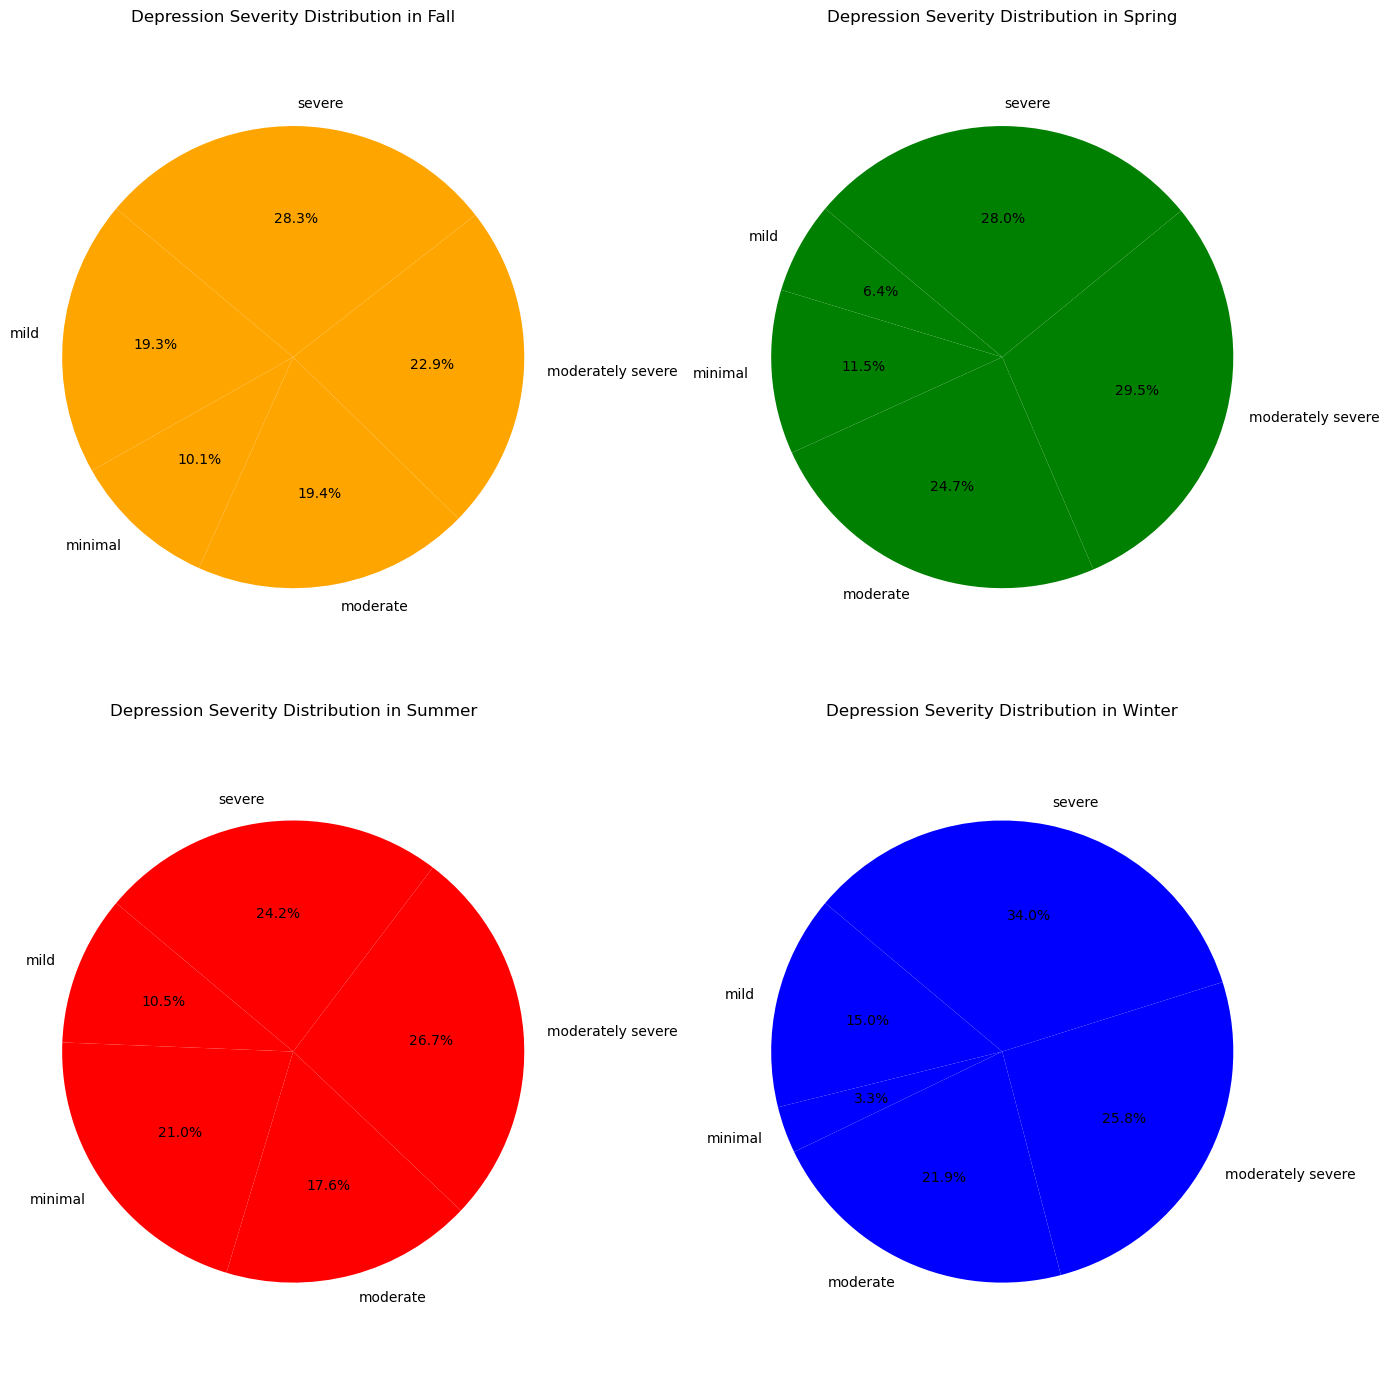

In [18]:
# Define colors for each season
season_colors = {
    'winter': 'blue',
    'spring': 'green',
    'summer': 'red',
    'fall': 'orange'
}

# Create subplots for the pie charts
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Loop over each season and create a pie chart with the corresponding colors
for i, (season, counts) in enumerate(severity_counts_per_season.iterrows()):
    ax = axes[i//2, i%2]
    colors = [season_colors[season]] * len(counts)
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(f'Depression Severity Distribution in {season.capitalize()}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so there's no overlap
plt.tight_layout()

# Show the plots
plt.show()

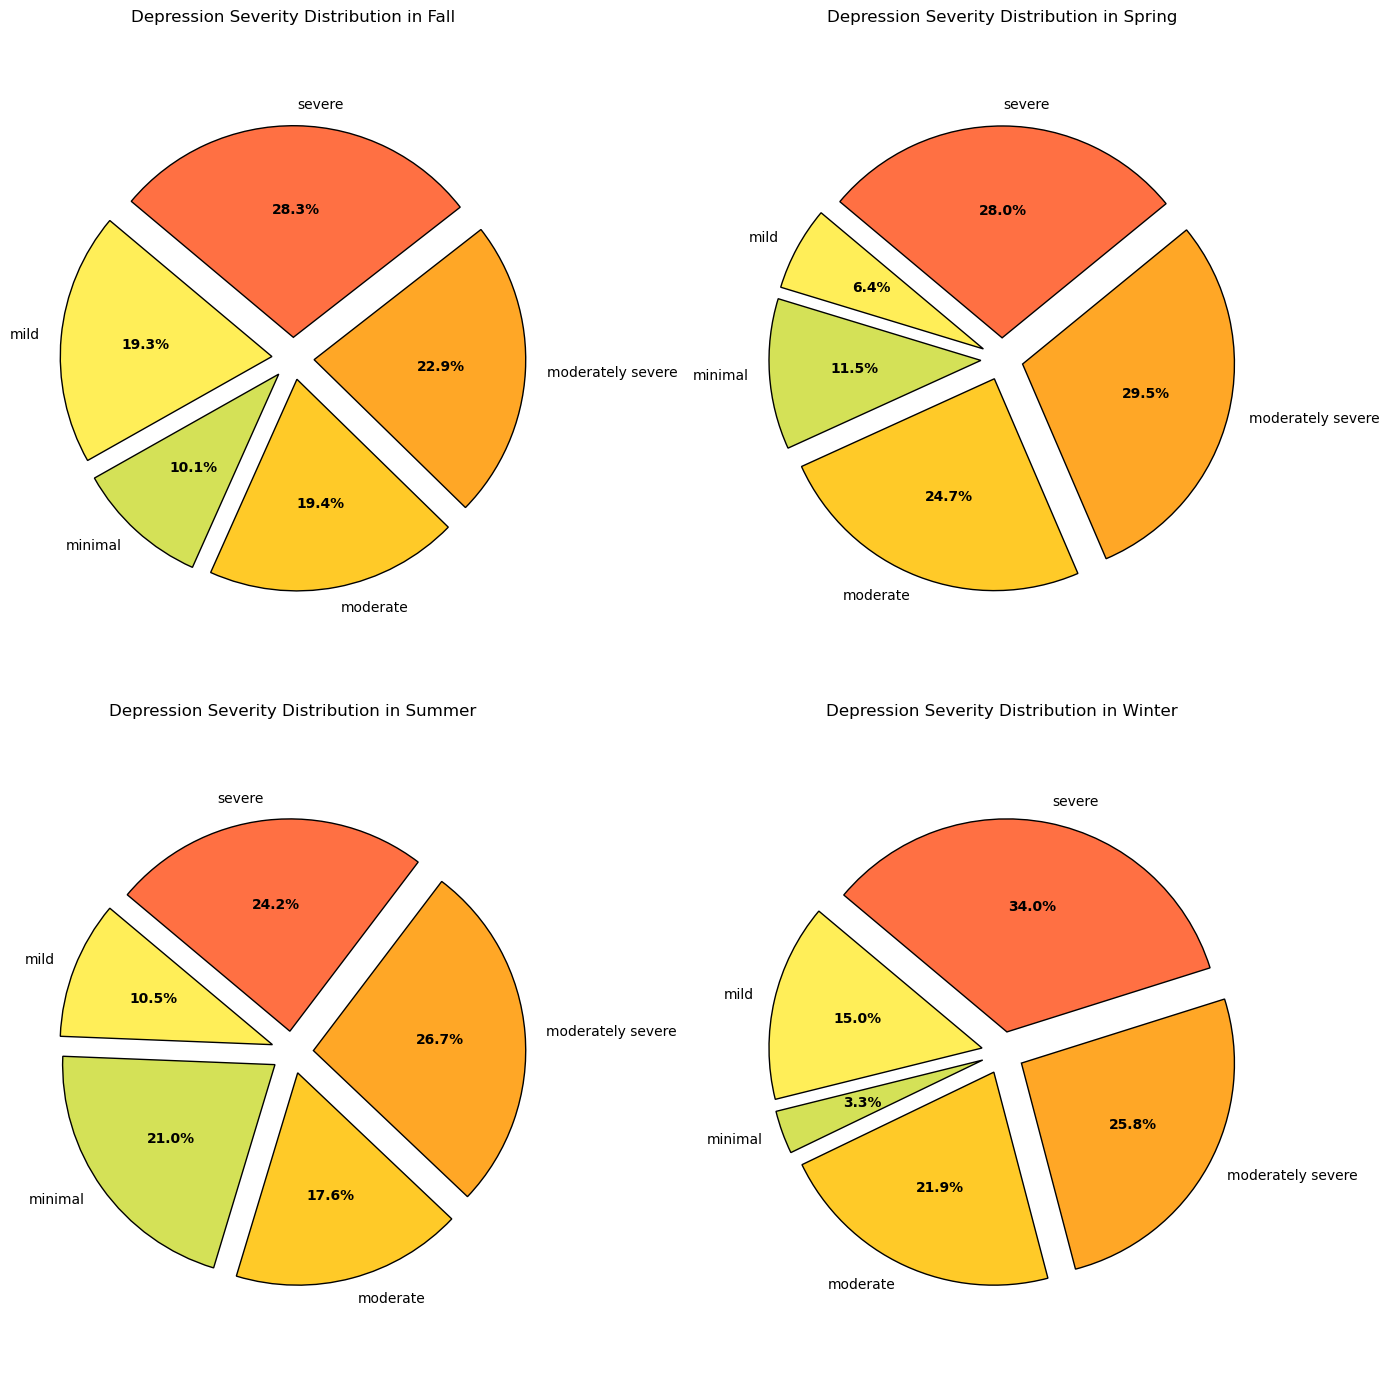

In [19]:
# Define a small gap to separate the pie chart segments
explode_gap = 0.1  # this will separate the slices a little

# Define colors for each severity level, which will be the same across all seasons for consistency
severity_colors = {
    'minimal': '#d4e157',
    'mild': '#ffee58',
    'moderate': '#ffca28',
    'moderately severe': '#ffa726',
    'severe': '#ff7043'
}

# Create subplots for the pie charts
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Loop over each season and create a pie chart with separated segments
for i, (season, counts) in enumerate(severity_counts_per_season.iterrows()):
    ax = axes[i//2, i%2]
    colors = [severity_colors[severity] for severity in counts.index]
    # Explode all segments a little bit
    explode = [explode_gap] * len(counts)
    wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
                                      colors=colors, explode=explode, wedgeprops=dict(linewidth=1, edgecolor='black'))

    # Bold the percentage texts
    for autotext in autotexts:
        autotext.set_weight('bold')

    ax.set_title(f'Depression Severity Distribution in {season.capitalize()}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so there's no overlap
plt.tight_layout()

# Show the plots
plt.show()

Uniformity Across Seasons:
The color coding for each level of depression severity is consistent across all seasons, which aids in comparison. If one severity level is notably more or less prevalent in a particular season, this would be visually apparent.

Severity Distribution:
The charts show the proportion of each severity category within each season. By examining the size of the segments, we can make observations such as whether mild depression is more common in winter compared to summer or if there are more severe cases in one season over another.

Seasonal Affective Disorder (SAD):
If there is a significant increase in moderate to severe depression during the winter months, it could be indicative of Seasonal Affective Disorder, a type of depression related to changes in seasons. Similarly, if there's a noticeable decrease during brighter months, this might suggest an alleviation of symptoms when there's more sunlight.

Comparison of Extremes:
By looking at the 'minimal' and 'severe' categories, we can assess the extremes of the spectrum. A larger 'severe' segment in one season may suggest a need for increased mental health resources during that time.

Data Integrity:
The separation of the segments enhances the visibility of smaller categories, which might be overlooked if the segments were not separated. This is particularly useful for identifying the prevalence of more severe categories that may require urgent attention and resources.

Quantitative Analysis:
The bold percentages allow for a quick quantitative assessment of each severity category. This can be beneficial for healthcare providers and policymakers to understand the burden of depression in the population and to allocate resources accordingly.

Trends and Patterns:
If the same individuals are taking the PHQ-9 across multiple seasons, patterns might emerge that could be indicative of individual or collective trends in mental health, although this would require additional data to confirm.

Need for Further Analysis:
While the pie charts provide a snapshot of the distribution of depression severity by season, they do not offer insights into the causes or any correlating factors. A deeper statistical analysis would be required to understand the underlying reasons for the observed distributions.

In conclusion, the visualizations are a starting point for understanding the seasonal variation in depression severity. However, to draw more concrete conclusions, a more detailed statistical analysis including other demographic and environmental factors would be necessary.

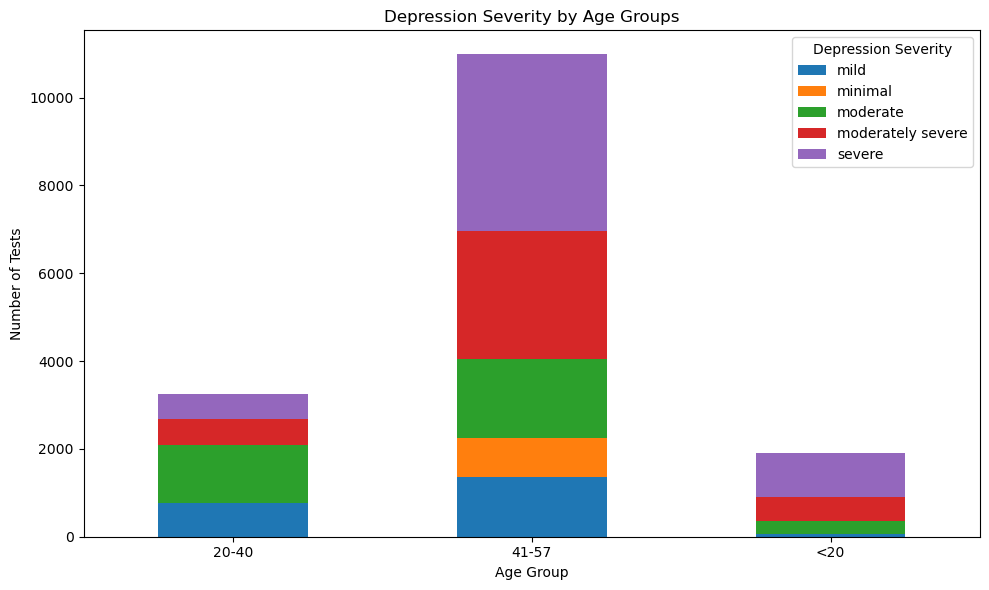

In [27]:
# Define a function to determine depression severity based on the total score
def determine_severity(score):
    if score <= 4:
        return 'minimal'
    elif score <= 9:
        return 'mild'
    elif score <= 14:
        return 'moderate'
    elif score <= 19:
        return 'moderately severe'
    else:
        return 'severe'

# Apply the function to create a new 'depression.severity' column
total_scores_df['depression.severity'] = total_scores_df['total.score'].apply(determine_severity)

# Define the function for age group classification
def age_group(age):
    if age < 20:
        return '<20'
    elif 20 <= age <= 30:
        return '20-40'
    else:
        return '41-57'

# Apply the function to create a new 'age_group' column
total_scores_df['age_group'] = total_scores_df['age'].apply(age_group)

# Group by the age groups and depression severity and count the occurrences
age_severity_counts = total_scores_df.groupby(['age_group', 'depression.severity']).size().unstack(fill_value=0)

# Plot the bar graph
age_severity_counts.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Depression Severity by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Tests')
plt.xticks(rotation=0)
plt.legend(title='Depression Severity')
plt.tight_layout()

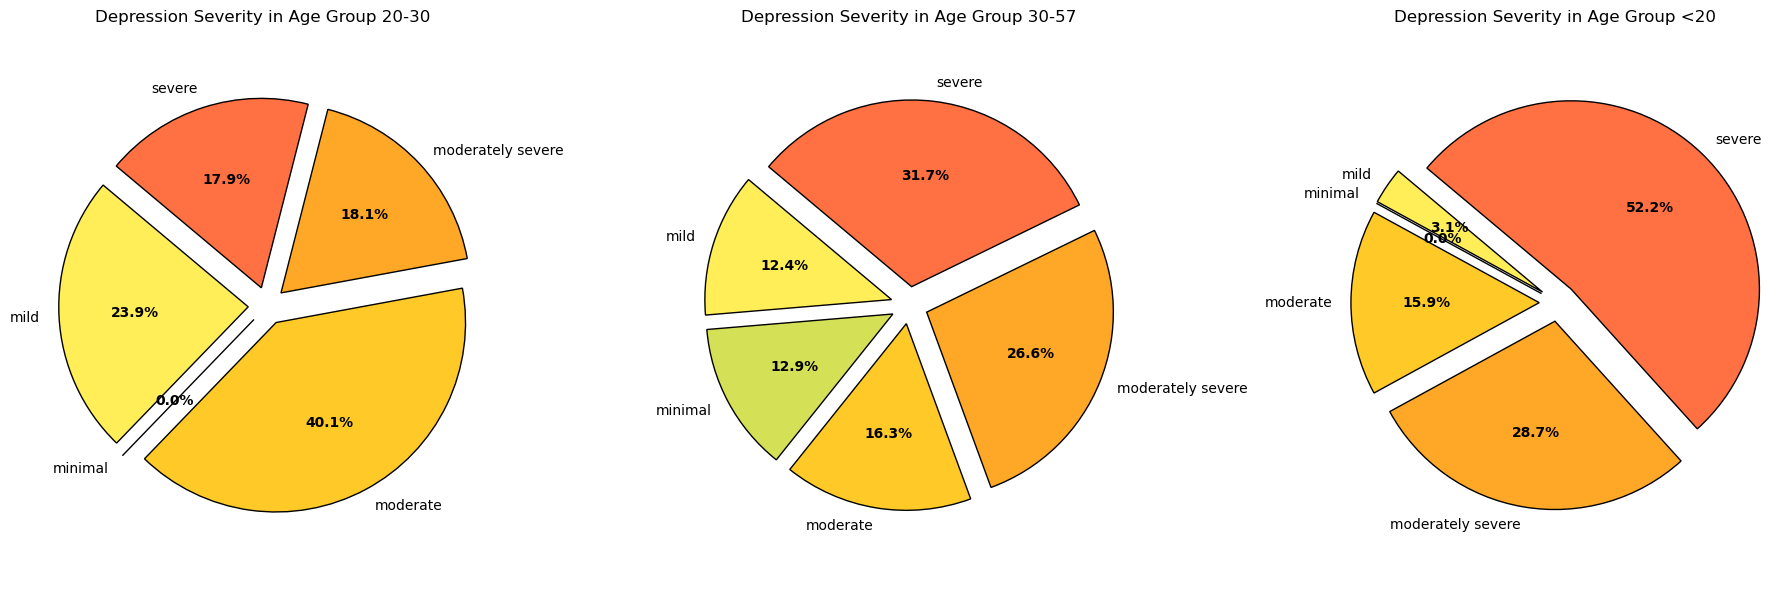

In [28]:
# Define the function to determine depression severity based on the total score
def determine_severity(score):
    if score <= 4:
        return 'minimal'
    elif score <= 9:
        return 'mild'
    elif score <= 14:
        return 'moderate'
    elif score <= 19:
        return 'moderately severe'
    else:
        return 'severe'

# Define the function for age group classification
def age_group(age):
    if age < 20:
        return '<20'
    elif 20 <= age <= 30:
        return '20-30'
    else:
        return '30-57'

# Assuming the total score is the sum of columns from 'phq1' to 'phq9'
score_columns = ['phq1', 'phq2', 'phq3', 'phq4', 'phq5', 'phq6', 'phq7', 'phq8', 'phq9']
total_scores_df['total.score'] = total_scores_df[score_columns].sum(axis=1)

# Apply the functions to create the new columns
total_scores_df['depression.severity'] = total_scores_df['total.score'].apply(determine_severity)
total_scores_df['age_group'] = total_scores_df['age'].apply(age_group)

# Group by the age groups and depression severity and count the occurrences
age_severity_counts = total_scores_df.groupby(['age_group', 'depression.severity']).size().unstack(fill_value=0)

# Define the colors for each severity level
severity_colors = {
    'minimal': '#d4e157',
    'mild': '#ffee58',
    'moderate': '#ffca28',
    'moderately severe': '#ffa726',
    'severe': '#ff7043'
}

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop over each age group and create a pie chart
for i, age_group in enumerate(age_severity_counts.index):
    ax = axes[i]
    counts = age_severity_counts.loc[age_group]
    colors = [severity_colors[severity] for severity in counts.index]
    explode = [0.1] * len(counts)  # explode all slices for emphasis
    wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
                                      colors=colors, explode=explode, wedgeprops=dict(linewidth=1, edgecolor='black'))

    # Bold the percentage texts
    for autotext in autotexts:
        autotext.set_weight('bold')

    ax.set_title(f'Depression Severity in Age Group {age_group}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so there's no overlap
plt.tight_layout()

# Show the plots
plt.show()

In [6]:
#testing access to the agg_df
agg_df.loc[agg_df['season'] == 'fall']['total.score']['mean']

0     24.0
1     17.0
2     18.0
3     23.0
4      9.0
5      NaN
6     19.0
7     21.0
8     25.0
9      3.0
10    22.0
11    27.0
12     6.0
13    14.0
14    23.0
15    11.0
16     4.0
17    24.0
18     5.0
19    19.0
20     NaN
21    11.0
22    17.0
23    16.0
24    26.0
25     8.0
Name: mean, dtype: float64

<BarContainer object of 26 artists>

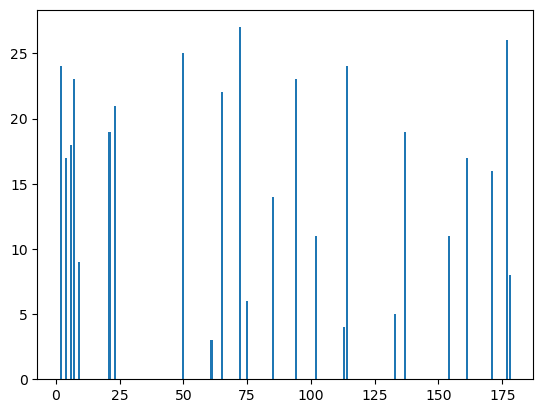

In [202]:
#not the best way to graph but to show how to access the agg_df
plt.bar(agg_df.loc[agg_df['season'] == 'fall']['user_id'], agg_df.loc[agg_df['season'] == 'fall']['total.score']['mean'])

In [203]:
#Do individuals have higher PHQ-9 scores, indicating more severe depressive symptoms, 
#during the winter months compared to the summer months?

In [204]:
#Which questions have higher scores during different seasons?
    #winter: December, January, February
    #spring: March, April, May
    #summer: June, July, August
    #fall: September, October, November

In [205]:
#Does age affect the score?

In [206]:
#Does gender affect the score?